In [1]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [21]:
# Load the Elon Musk tweets dataset with explicit encoding
elon_tweets_df = pd.read_csv("Elon_musk.csv", encoding='latin1')
elon_tweets_df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [16]:
# Load stopwords from text file
stop_word = pd.read_csv('stop.txt', delimiter=',')
stop_word.head(5)

,a
0,a's
1,able
2,about
3,above
4,according


In [15]:
# Load positive and negative words
positive_words = set(pd.read_csv('positive-words.txt', delimiter='\t', header=None, comment=';', encoding='latin1')[0])
negative_words = set(pd.read_csv("negative-words.txt", delimiter='\t', header=None, comment=';', encoding='latin1')[0])

# Display a few words from each set
print("Positive Words:", list(positive_words)[:5])
print("Negative Words:", list(negative_words)[:5])




Positive Words: ['felicitous', 'favorable', 'enviably', 'courage', 'openness']
Negative Words: ['feeble', 'controversial', 'humiliation', 'capsize', 'hapless']


In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# Function to perform sentiment analysis
def analyze_sentiment(Text):
    # Tokenize the tweet
    tokens = word_tokenize(Text)
    # Remove stop words and punctuation
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_word]
    # Calculate sentiment score based on positive and negative words
    sentiment = sum(1 for word in filtered_tokens if word in positive_words) - sum(1 for word in filtered_tokens if word in negative_words)
    return sentiment

In [31]:
# Add a new column for sentiment analysis
elon_tweets_df['Sentiment'] = elon_tweets_df['Text'].apply(analyze_sentiment)

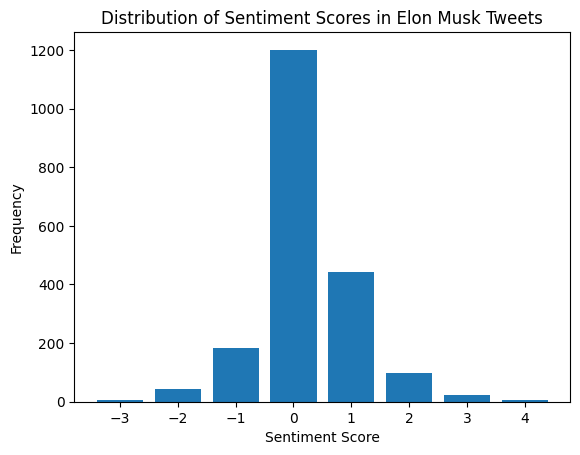

In [34]:
import matplotlib.pyplot as plt

# Group the DataFrame by sentiment scores and count the occurrences of each sentiment
sentiment_counts = elon_tweets_df['Sentiment'].value_counts()

# Plot the distribution of sentiment scores
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores in Elon Musk Tweets')
plt.xticks(sentiment_counts.index)
plt.show()


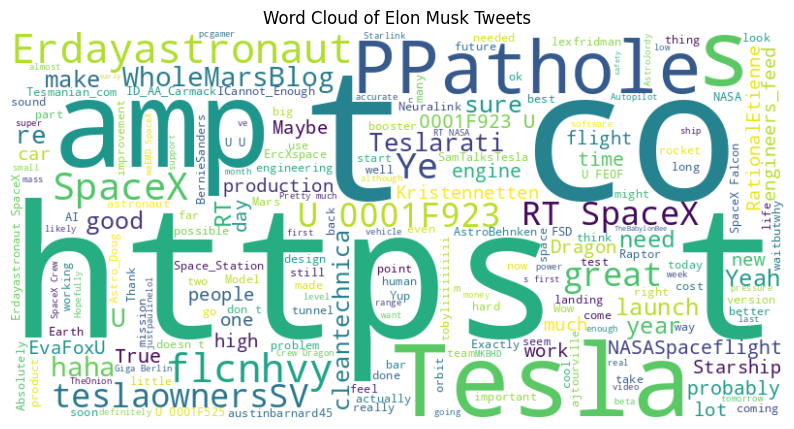

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the tweets into a single string
all_tweets_text = ' '.join(elon_tweets_df['Text'])

# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Elon Musk Tweets')
plt.show()
